# Linear Regression Project

## Data

- **datetime**: hourly date + timestamp
- **season**: 
  - 1: spring
  - 2: summer
  - 3: fall
  - 4: winter
- **holiday**: whether the day is considered a holiday
- **workingday**: whether the day is neither a weekend nor holiday
- **weather**:
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: temperature in Celsius
- **atemp**: "feels like" temperature in Celsius
- **humidity**: relative humidity
- **windspeed**: wind speed
- **casual**: number of non-registered user rentals initiated
- **registered**: number of registered user rentals initiated
- **count**: number of total rentals

**Read bikeshare.csv file**

In [1]:
bike <- read.csv('C:\\Users\\worme\\Desktop\\R course\\R-Course-HTML-Notes\\R-for-Data-Science-and-Machine-Learning\\Training Exercises\\Machine Learning Projects\\CSV files for ML Projects\\bikeshare.csv')

**Check the head of df**

In [2]:
head(bike)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


In [3]:
summary(bike)

                datetime         season         holiday          workingday    
 2011-01-01 00:00:00:    1   Min.   :1.000   Min.   :0.00000   Min.   :0.0000  
 2011-01-01 01:00:00:    1   1st Qu.:2.000   1st Qu.:0.00000   1st Qu.:0.0000  
 2011-01-01 02:00:00:    1   Median :3.000   Median :0.00000   Median :1.0000  
 2011-01-01 03:00:00:    1   Mean   :2.507   Mean   :0.02857   Mean   :0.6809  
 2011-01-01 04:00:00:    1   3rd Qu.:4.000   3rd Qu.:0.00000   3rd Qu.:1.0000  
 2011-01-01 05:00:00:    1   Max.   :4.000   Max.   :1.00000   Max.   :1.0000  
 (Other)            :10880                                                     
    weather           temp           atemp          humidity     
 Min.   :1.000   Min.   : 0.82   Min.   : 0.76   Min.   :  0.00  
 1st Qu.:1.000   1st Qu.:13.94   1st Qu.:16.66   1st Qu.: 47.00  
 Median :1.000   Median :20.50   Median :24.24   Median : 62.00  
 Mean   :1.418   Mean   :20.23   Mean   :23.66   Mean   : 61.89  
 3rd Qu.:2.000   3rd Qu.:26.24

## Exploratory Data Analysis

In [4]:
library(ggplot2)
library(data.table)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [5]:
options(repr.plot.width=6, repr.plot.height=5)

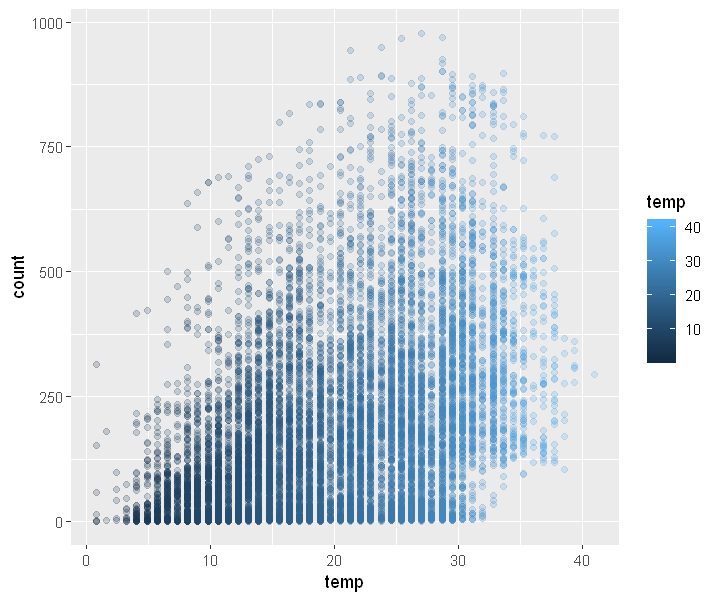

In [6]:
pl <- ggplot(bike,aes(x=temp,y=count,color=temp)) + geom_point(alpha=0.2) 
pl

In [7]:
bike$datetime <- as.POSIXct(bike$datetime)

In [8]:
str(bike)

'data.frame':	10886 obs. of  12 variables:
 $ datetime  : POSIXct, format: "2011-01-01 00:00:00" "2011-01-01 01:00:00" ...
 $ season    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ holiday   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ workingday: int  0 0 0 0 0 0 0 0 0 0 ...
 $ weather   : int  1 1 1 1 1 2 1 1 1 1 ...
 $ temp      : num  9.84 9.02 9.02 9.84 9.84 ...
 $ atemp     : num  14.4 13.6 13.6 14.4 14.4 ...
 $ humidity  : int  81 80 80 75 75 75 80 86 75 76 ...
 $ windspeed : num  0 0 0 0 0 ...
 $ casual    : int  3 8 5 3 0 0 2 1 1 8 ...
 $ registered: int  13 32 27 10 1 1 0 2 7 6 ...
 $ count     : int  16 40 32 13 1 1 2 3 8 14 ...


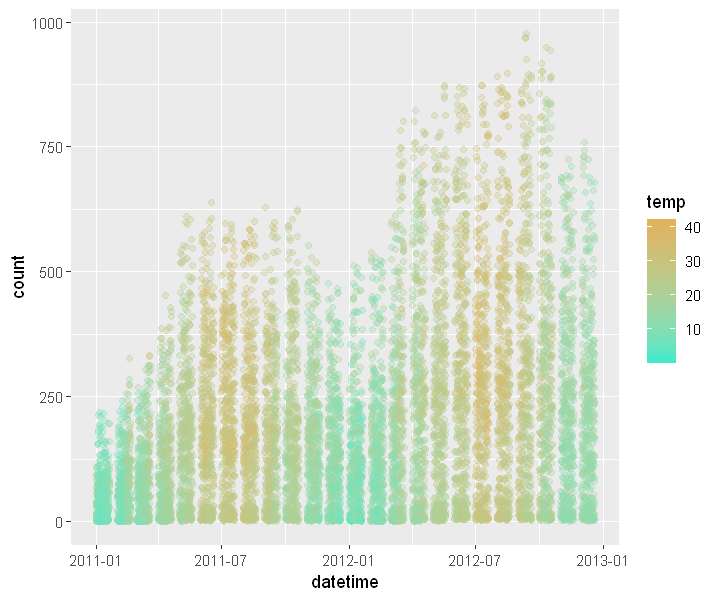

In [9]:
pl2 <- ggplot(bike,aes(x=datetime,y=count,color=temp)) + geom_point(alpha=0.3) + scale_color_gradient(low = "#43e9cc", high = "#e0b35f")
pl2

**We can notice two things: A seasonality to the data, for winter and summer. Also that bike rental counts are increasing in general. This may present a problem with using a linear regression model if the data is non-linear. Let's have a quick overview of pros and cons right now of Linear Regression:**

**Pros:**
- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

**Cons:**
- Assumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions

**What is the correlation between temp and count?**

In [10]:
# Grab only needed columns
cor.cols <- bike[c('temp', 'count')]

# Correlation 
cor.data <- cor(cor.cols)

cor.data

,temp,count
temp,1.0000000,0.3944536
count,0.3944536,1.0000000


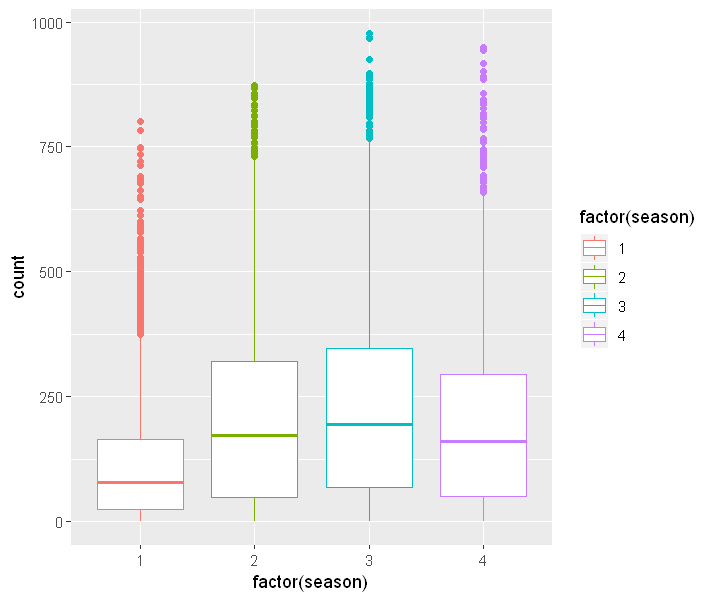

In [11]:
pl3 <- ggplot(bike,aes(x=factor(season),y=count,color=factor(season))) + geom_boxplot()
pl3

## Feature Engineering

**Create an "hour" column that takes the hour from the datetime column**

In [12]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [13]:
bike$hour <- format(bike$datetime, "%H")

In [14]:
head(bike)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,00
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,01
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,02
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,03
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,04
2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,05


**Now create a scatterplot of count versus hour, with color scale based on temp. Only use bike data where workingday==1.**

In [15]:
w.days.bike <- filter(bike,workingday==1)

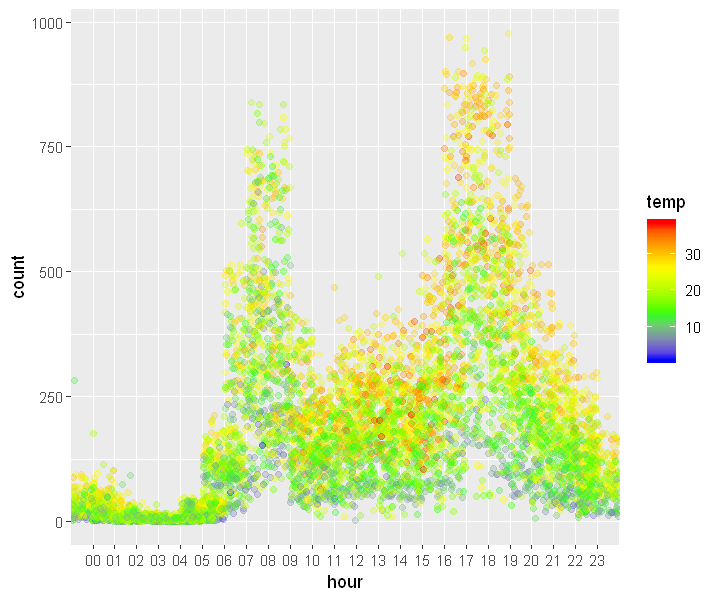

In [16]:
pl4 <- ggplot(w.days.bike,aes(x=hour,y=count,color=temp)) + geom_point(alpha=0.3,,position=position_jitter(w=1, h=0)) + scale_color_gradientn(colors=c("blue","green","yellow","red"))
pl4

**Now create the same plot for non working days:**

In [17]:
nonw.days.bike <- filter(bike,workingday==0)

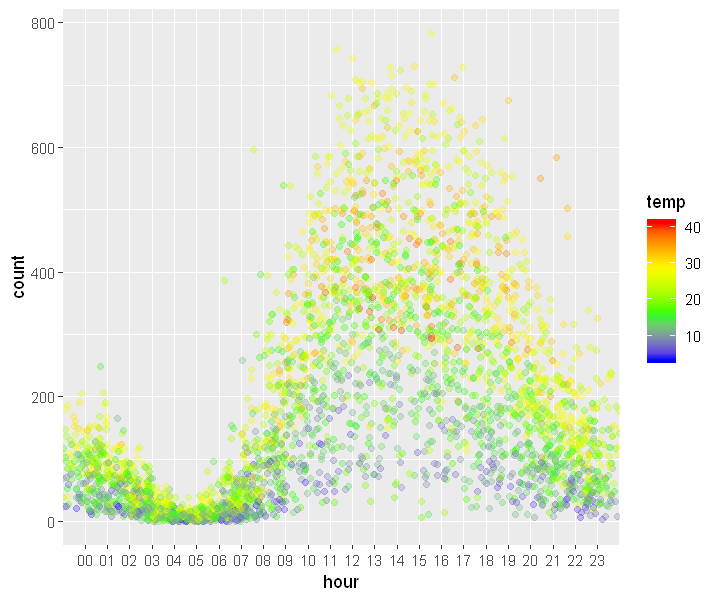

In [18]:
pl5 <- ggplot(nonw.days.bike,aes(x=hour,y=count,color=temp)) + geom_point(alpha=0.3,,position=position_jitter(w=1, h=0)) + scale_color_gradientn(colors=c("blue","green","yellow","red"))
pl5

**We can notice that working days have peak activity during the morning (~8am) and right after work gets out (~5pm), with some lunchtime activity. While the non-work days have a steady rise and fall for the afternoon**

## Building the Model

**Use lm() to build a model that predicts count based solely on the temp feature, name it temp.model**

In [19]:
df <- bike[c("temp","count")]

In [20]:
library(caTools)

In [21]:
set.seed(101)

#Split up the sample, basically randomly assigns a booleans to a new column "sample"
sample <- sample.split(df$count, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train = subset(df, sample == TRUE)

# Testing Data
test = subset(df, sample == FALSE)



In [22]:
dim(train)

[1] 7637    2

In [23]:
dim(test)

[1] 3249    2

In [24]:
model <- lm(count ~ .,train)

In [25]:
summary(model)


Call:
lm(formula = count ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-294.84 -114.05  -34.17   79.90  739.51 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.7949     5.3107   1.656   0.0978 .  
temp          9.1320     0.2454  37.213   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 168.4 on 7635 degrees of freedom
Multiple R-squared:  0.1535,	Adjusted R-squared:  0.1534 
F-statistic:  1385 on 1 and 7635 DF,  p-value: < 2.2e-16


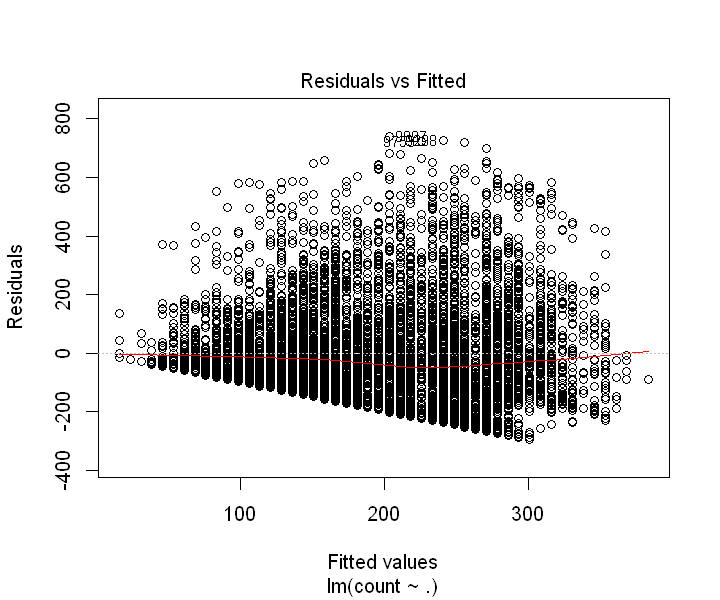

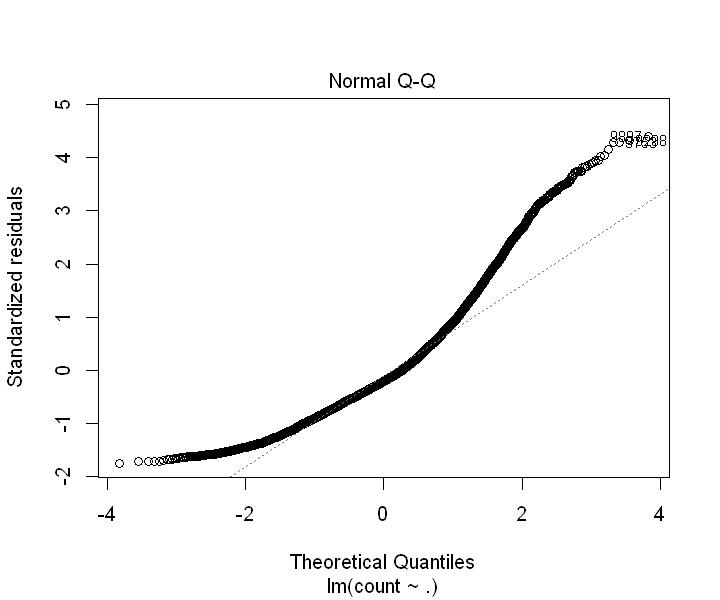

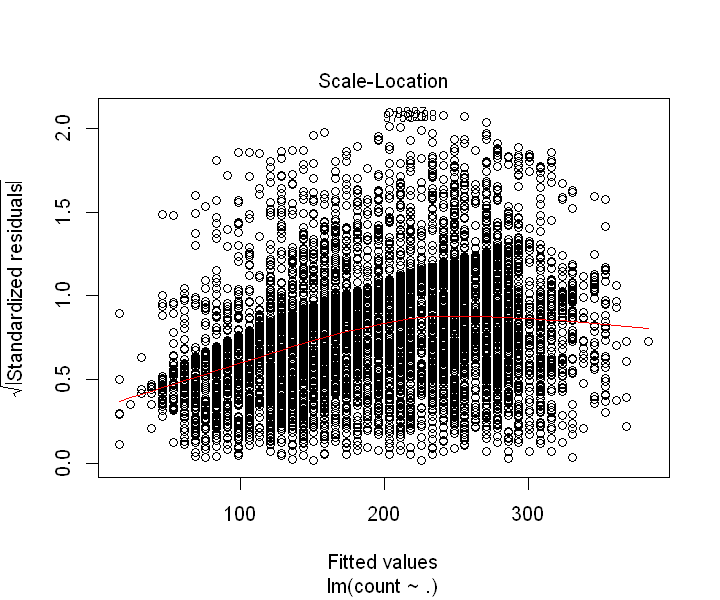

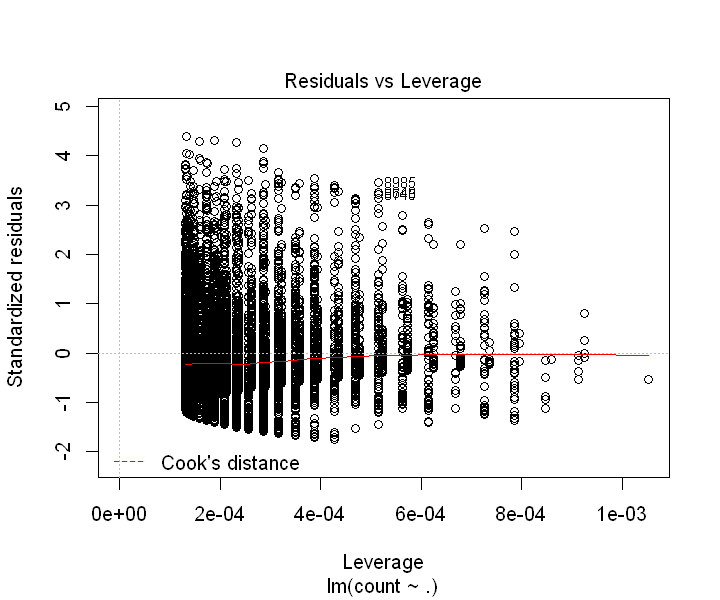

In [26]:
plot(model)

In [27]:
count.predictions <- predict(model,test)

In [28]:
results <- cbind(count.predictions,test$count) 
colnames(results) <- c('pred','real')
results <- as.data.frame(results)

In [29]:
mse <- mean((results$real-results$pred)^2)
print(mse)

[1] 26179.75


In [30]:
mse^0.5

[1] 161.8016

In [31]:
SSE = sum((results$pred - results$real)^2)
SST = sum( (mean(df$count) - results$real)^2)

R2 = 1 - SSE/SST
R2

[1] 0.1602651

**Let's try with more features**

In [32]:
df2 <- subset(bike, select = c(season, holiday, workingday, weather, temp, humidity, windspeed, hour,count))

In [33]:
# Convert non-numeric columns to numeric excluding 'count'
numeric_columns <- df2 %>%
  mutate_if(is.character, as.numeric) %>%
  select(-count)

# Standardize numeric columns excluding 'count'
standardized_columns <- as.data.frame(scale(numeric_columns))

# Add the non-standardized 'count' column back to the standardized dataframe
df2_standardized <- cbind(standardized_columns,df2["count"])

In [34]:
head(df2_standardized)

season,holiday,workingday,weather,temp,humidity,windspeed,hour,count
-1.349802,-0.1714826,-1.460605,-0.6601481,-1.333599,0.9931674,-1.5676817,-1.6688669,16
-1.349802,-0.1714826,-1.460605,-0.6601481,-1.438841,0.9412060,-1.5676817,-1.5242713,40
-1.349802,-0.1714826,-1.460605,-0.6601481,-1.438841,0.9412060,-1.5676817,-1.3796756,32
-1.349802,-0.1714826,-1.460605,-0.6601481,-1.333599,0.6813987,-1.5676817,-1.2350800,13
-1.349802,-0.1714826,-1.460605,-0.6601481,-1.333599,0.6813987,-1.5676817,-1.0904844,1
-1.349802,-0.1714826,-1.460605,0.9175406,-1.333599,0.6813987,-0.8324042,-0.9458887,1


In [35]:
sample <- sample.split(df2_standardized$count, SplitRatio = 0.70) # SplitRatio = percent of sample==TRUE

# Training Data
train2 = subset(df2_standardized, sample == TRUE)

# Testing Data
test2 = subset(df2_standardized, sample == FALSE)

In [36]:
model2 <- lm(count ~ .,train2)

In [37]:
summary(model2)


Call:
lm(formula = count ~ ., data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-316.10  -98.05  -31.83   54.80  679.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  192.204      1.716 112.017   <2e-16 ***
season        25.343      1.819  13.930   <2e-16 ***
holiday       -1.533      1.775  -0.864    0.388    
workingday     2.330      1.781   1.308    0.191    
weather       -1.972      1.924  -1.025    0.305    
temp          54.295      1.811  29.989   <2e-16 ***
humidity     -42.571      2.118 -20.102   <2e-16 ***
windspeed      2.292      1.847   1.241    0.215    
hour          53.349      1.824  29.251   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 149.9 on 7628 degrees of freedom
Multiple R-squared:  0.3298,	Adjusted R-squared:  0.3291 
F-statistic: 469.2 on 8 and 7628 DF,  p-value: < 2.2e-16


In [38]:
count.predictions2 <- predict(model2,test2)

In [44]:
results2 <- cbind(count.predictions2,test2$count) 
colnames(results2) <- c('pred','real')
results2 <- as.data.frame(results2)

In [45]:
mse2 <- mean((results2$real-results2$pred)^2)
print(mse2)

[1] 20425.66


In [46]:
mse2^0.5

[1] 142.9184

In [47]:
SSE2 = sum((results2$pred - results2$real)^2)
SST2 = sum( (mean(df2_standardized$count) - results2$real)^2)

R2.2 = 1 - SSE2/SST2
R2.2

[1] 0.3448316

### **With an R-squared value of 0.34, we can infer that the model poorly explains the variance in the data, indicating that linear regression may not be suitable for this type of prediction.**